MOBILOS

1. Webscrabe mobiltelefonernes navne og priser fra Komplett.dk - https://www.komplett.dk/category/21064/mobil/mobiltelefoner

In [34]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.common.exceptions import TimeoutException
import time

komplett_url =  "https://www.komplett.dk/category/21064/mobil/mobiltelefoner"
kompletts_cellphones = []

def get_browser():
    profile = webdriver.FirefoxProfile()
    profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
    options = Options()
    options.headless = True
    browser = webdriver.Firefox(profile, options=options)
    return browser

def scraping_komplett_cellphones(komplett_url):
    browser = get_browser()
    browser.get(komplett_url)
    browser.implicitly_wait(2)
    #browser.execute_script("window.scrollTo(0,document.body.scrollHeight)") #kan jeg ikke få til at virke - æv!
    
    cellphones = browser.find_elements_by_class_name("product-link")
    browser.close
    return {cellphone.get_attribute('href') for cellphone in cellphones} 

def scrape_link(komplett_cellphone_url):
    #print(komplett_cellphone_url)
    try:
        browser = get_browser()
        browser.get(komplett_cellphone_url)
        #time.sleep(2)
        browser.implicitly_wait(2)
        title = browser.title
        name = title.rstrip("- Mobiltelefoner - Komplett.dk")
        #print(name)
        price_elements = browser.find_elements_by_class_name("product-price-now")
        price_lst = [price.text for price in price_elements]
        browser.close
        #print(price_lst[0])
        cellphone = {"navn":name, "pris":price_lst[0]}
        return kompletts_cellphones.append(cellphone)
    except TimeoutException:
        return

cellphone_links = scraping_komplett_cellphones(komplett_url)
print(len(cellphone_links))
for link in cellphone_links:
    scrape_link(link)

print(kompletts_cellphones)
print(len(kompletts_cellphones))

24
[{'navn': 'iPhone 12 mini 128GB (blå)', 'pris': '5.795,-'}, {'navn': 'Cat S42H+ 32GB (sort)', 'pris': '1.999,-'}, {'navn': 'OnePlus Nord 2 5G 256GB+12GB (gray sierra)', 'pris': '3.399,-'}, {'navn': 'Sony Xperia 1 III 12+256GB (sort)', 'pris': '9.999,-'}, {'navn': 'Samsung Galaxy A52s 5G 128GB (black)', 'pris': '3.399,-'}, {'navn': 'iPhone 12 64GB (blå)', 'pris': '5.830,-'}, {'navn': 'iPhone 12 128GB (sort)', 'pris': '6.399,-'}, {'navn': 'Sony Xperia 10 III 6+128 GB (hvid)', 'pris': '3.496,-'}, {'navn': 'Motorola Moto G100 8+128GB (magic blue)', 'pris': '3.699,-'}, {'navn': 'iPhone 12 256GB (hvid)', 'pris': '7.599,-'}, {'navn': 'Samsung Galaxy A52s 5G 128GB (white)', 'pris': '3.399,-'}, {'navn': 'OnePlus 9 8+128GB (arctic sky)', 'pris': '5.448,-'}, {'navn': 'Nokia 105 (sort)', 'pris': '159,-'}, {'navn': 'Samsung Galaxy XCover 5 64 GB Enterpris', 'pris': '2.199,-'}, {'navn': 'OnePlus 9 Pro 8+128GB (morning mist)', 'pris': '5.555,-'}, {'navn': 'Samsung Galaxy Xcover Pro 64 GB (sort)', 

2. Plot gennemsnitspriserne på Samsung og Iphone i et bar-graf eller linjediagram:

[{'navn': 'iPhone 12 mini 128GB (blå)', 'pris': '5.795,-'}, {'navn': 'Cat S42H+ 32GB (sort)', 'pris': '1.999,-'}, {'navn': 'OnePlus Nord 2 5G 256GB+12GB (gray sierra)', 'pris': '3.399,-'}, {'navn': 'Sony Xperia 1 III 12+256GB (sort)', 'pris': '9.999,-'}, {'navn': 'Samsung Galaxy A52s 5G 128GB (black)', 'pris': '3.399,-'}, {'navn': 'iPhone 12 64GB (blå)', 'pris': '5.830,-'}, {'navn': 'iPhone 12 128GB (sort)', 'pris': '6.399,-'}, {'navn': 'Sony Xperia 10 III 6+128 GB (hvid)', 'pris': '3.496,-'}, {'navn': 'Motorola Moto G100 8+128GB (magic blue)', 'pris': '3.699,-'}, {'navn': 'iPhone 12 256GB (hvid)', 'pris': '7.599,-'}, {'navn': 'Samsung Galaxy A52s 5G 128GB (white)', 'pris': '3.399,-'}, {'navn': 'OnePlus 9 8+128GB (arctic sky)', 'pris': '5.448,-'}, {'navn': 'Nokia 105 (sort)', 'pris': '159,-'}, {'navn': 'Samsung Galaxy XCover 5 64 GB Enterpris', 'pris': '2.199,-'}, {'navn': 'OnePlus 9 Pro 8+128GB (morning mist)', 'pris': '5.555,-'}, {'navn': 'Samsung Galaxy Xcover Pro 64 GB (sort)', 'pr

<IPython.core.display.Javascript object>


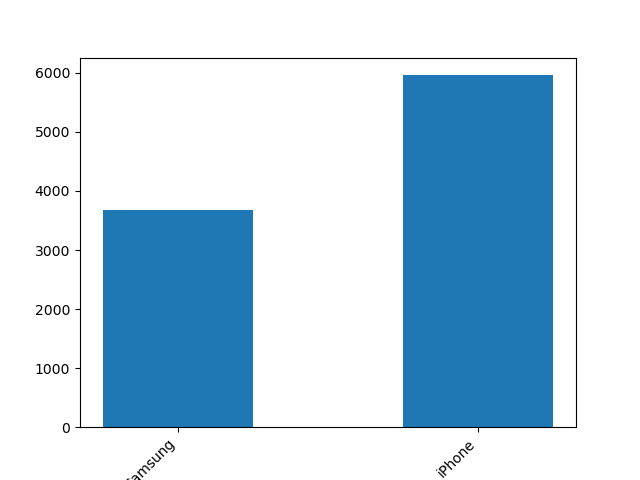

In [98]:
%matplotlib notebook
import matplotlib.pyplot as plt

#kompletts_cellphones = []

def type_phone_avarage(type_phone, phones):
    total_price = 0
    price = "0"
    amount = 0
    for phone in phones:
        type_phone_tmp = phone["navn"][:len(type_phone)]
        if type_phone == type_phone_tmp:
            for number in phone["pris"]:
                if number.isdigit():
                    price = price + number
            total_price = total_price + int(price)
            price = "0"
            amount = amount + 1
    return total_price/amount

def iphone_avarage(phones):
    return type_phone_avarage("iPhone", phones)
    
def samsung_avarage(phones):
    return type_phone_avarage("Samsung", phones)
    
def bar_plotting(phones):
    plt.bar(['Samsung','iPhone'],[samsung_avarage(phones),iphone_avarage(phones)],width=0.5, align='center')
    plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
    
#cellphone_links = scraping_komplett_cellphones(komplett_url)
#for link in cellphone_links:
#    scrape_link(link)
print(kompletts_cellphones)
print(iphone_avarage(kompletts_cellphones))
print(samsung_avarage(kompletts_cellphones))
bar_plotting(kompletts_cellphones)